In [5]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

# --- DADOS DE TREINAMENTO ---

dados = pd.read_csv('/content/Treinamento_NPC.txt', header=None)

QUANTIDADE_COLUNAS = dados.shape[1]

print(f"Quantidade de colunas no dataset: {QUANTIDADE_COLUNAS}")

# Separa as features (X, primeiras QUANTIDADE_COLUNAS colunas) e o alvo (Y, última coluna)
X_df = dados.iloc[:, 0:QUANTIDADE_COLUNAS-1]
Y_series = dados.iloc[:, QUANTIDADE_COLUNAS-1]

# Converter colunas de texto em números
X_processado = X_df.copy()
mapeamento_features = {}

for col_idx in [1, 2, 3]:
    codigos, legenda = pd.factorize(X_df[col_idx])
    X_processado[col_idx] = codigos
    mapeamento_features[col_idx] = {texto: codigo for codigo, texto in enumerate(legenda)}


# Converte a coluna alvo (Y) de texto para números
Y_numerico, legenda_classes = pd.factorize(Y_series)
num_classes = len(legenda_classes)

# Normaliza os dados
scaler = StandardScaler()
X_final = scaler.fit_transform(X_processado)

# Transforma os dados
Y_one_hot = []
for i in range(len(Y_numerico)):
    linha = []
    for j in range(num_classes):
      if j == Y_numerico[i]:
        linha.append(1)
      else:
        linha.append(0)
    Y_one_hot.append(linha)

Y_final = np.array(Y_one_hot)



Quantidade de colunas no dataset: 12


In [6]:
# --- MODELO E TREINAMENTO ---

modelo = Sequential()
modelo.add(Dense(32, input_dim=X_final.shape[1], activation='relu'))
# A camada de saída tem o número de neurônios igual ao número de classes
modelo.add(Dense(num_classes, activation='sigmoid'))

# Compila o modelo
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Treina o Modelo
print("Iniciando o treinamento...")
resultado = modelo.fit(X_final, Y_final, batch_size=32, epochs=4000, verbose=1)

A saída de streaming foi truncada nas últimas 5000 linhas.
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9839 - loss: 0.0241
Epoch 1502/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9897 - loss: 0.0249
Epoch 1503/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9771 - loss: 0.0256
Epoch 1504/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9828 - loss: 0.0247
Epoch 1505/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9853 - loss: 0.0247
Epoch 1506/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9835 - loss: 0.0266
Epoch 1507/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9779 - loss: 0.0252
Epoch 1508/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9865 - loss: 0.0243
Epoch 1509/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9840 - loss: 0.0246
Epoch 1510/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9812 - loss: 0.0239
Epoch 1511/4000
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 12)             │           396 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,342 (9.15 KB)

 Trainable params: 780 (3.05 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,562 (6.11 KB)

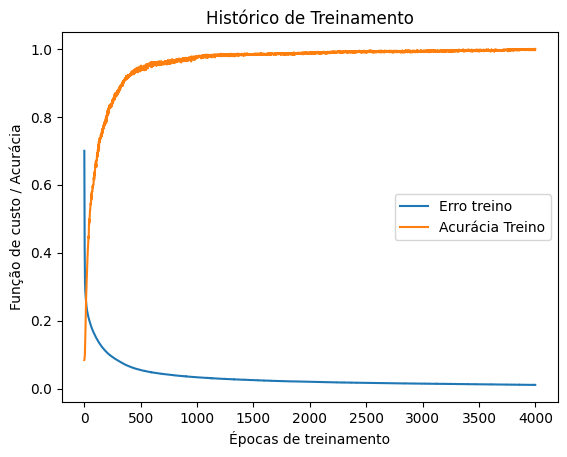

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step

Probabilidades Preditas:
 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0000000e+00
  0.0000000e+00 0.0000000e+00 1.3111155e-29 2.0795372e-07 1.2615407e-08
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 9.9594247e-01
  0.0000000e+00 0.0000000e+00 3.4591677e-22 4.6726719e-02 3.0004187e-05
  0.0000000e+00 1.6510677e-31]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 1.0777735e-08
  0.0000000e+00 0.0000000e+00 4.7154745e-12 4.0668797e-01 7.7378136e-01
  0.0000000e+00 3.7961693e-21]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 4.4172253e-30
  0.0000000e+00 0.0000000e+00 9.9747080e-01 3.8152538e-25 5.9610331e-01
  0.0000000e+00 4.3576818e-13]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
  0.0000000e+00 0.0000000e+00 7.8230578e-04 0.0000000e+00 8.9480048e-35
  0.0000000e+00 9.9997509e-01]]

Índices das Classes Preditas: [ 4  4  9  7 11  2  3  6  0 

In [8]:
# Mostra a rede
modelo.summary()


# Mostra o gráfico do histórico de treinamento
plt.plot(resultado.history['loss'])
plt.plot(resultado.history['accuracy'])
plt.title('Histórico de Treinamento')
plt.ylabel('Função de custo / Acurácia')
plt.xlabel('Épocas de treinamento')
plt.legend(['Erro treino', 'Acurácia Treino'])
plt.savefig('Historico de treinamento.png')

plt.show()



# --- DADOS DE TESTE E PREVISÃO ---

# Carrega conjunto de teste
testes = pd.read_csv('/content/Teste_NPC.txt', header=None)

# Separa as features de teste
Xtestes_df = testes.iloc[:, 0:QUANTIDADE_COLUNAS-1]

# Conversão de  texto para número usada no treinamento
Xtestes_processado = Xtestes_df.copy()
for col_idx in [1, 2, 3]:
    mapa = mapeamento_features[col_idx]
    Xtestes_processado[col_idx] = Xtestes_df[col_idx].map(mapa).fillna(-1) # -1 para categorias não vistas

# Normaliza os dados de teste
Xtestes_final = scaler.transform(Xtestes_processado)

# Testa a rede
Y_predito_prob = modelo.predict(Xtestes_final)
print("\nProbabilidades Preditas:\n", Y_predito_prob[:5]) # Mostra as 5 primeiras

# Converte as previsões de volta para a classe original
# np.argmax é uma forma eficiente de fazer o que seu loop original fazia
indices_preditos = np.argmax(Y_predito_prob, axis=1)
classes_preditas = legenda_classes[indices_preditos]

print("\nÍndices das Classes Preditas:", indices_preditos)
print("\nLegenda das Classes:", legenda_classes)
print("\nClasses Preditas:\n", classes_preditas)


# Ver Resposta
Y_Resposta = pd.DataFrame(data=classes_preditas, columns=['Previsão de Classe'])
print("\nResposta Final:")
print(Y_Resposta)